In [2]:
### Import libraries

import pandas as pd
from numpy import arange
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Set figure style
sns.set(rc = {'figure.figsize': (4, 3), 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})

# Data
input1_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/67_15_updatecurve2.csv"
input2_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Area_2h_firsttimepoints_for xcal.csv"
input4_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Updated_6715_finetimeing_stage10.csv"

# Define data
df1 = pd.read_csv(input1_csv)
df2 = pd.read_csv(input2_csv)
df4 = pd.read_csv(input4_csv)


# Fitting exponential curve for control from df1
x6 = df1['Hours6']
y6 = df1['Int_67_15_updated']

p6 = np.polyfit(x6, np.log(y6), 1)
f6 = lambda x6: np.exp(p6[1]) * np.exp(p6[0]*x6)

# Calculate R-squared value
from sklearn.metrics import r2_score 

R6_square = r2_score(y6, f6(x6)) 

print('Coefficient of Determination:', R6_square)
print('Slope:', p6[0])
print('Intercept (exp(p6[1])):', np.exp(p6[1]))

# Calculate the corresponding x value using the natural logarithm

yEC = df2['Area_EC_2h_updated']
xEC = (np.log(yEC/np.exp(p6[1])))/p6[0]

# Save xEC values to a CSV file
csv_file_path = '/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/67_15updated_predictedxoutput2.csv'  # Provide the desired file path

#with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['xEC']) 
    
    for value in xEC:
        writer.writerow([value])

#print(f'The xEC values have been saved to {csv_file_path}')

# Print the result
print("The corresponding x1 value for y1=", yEC, " is ", xEC)


Coefficient of Determination: 0.7690943149043187
Slope: 0.06060557869884785
Intercept (exp(p6[1])): 272.9750007677092
The corresponding x1 value for y1= 0      16226.944340
1      51055.702010
2       3052.864794
3      48691.499510
4       7333.955380
           ...     
192             NaN
193             NaN
194             NaN
195             NaN
196             NaN
Name: Area_EC_2h_updated, Length: 197, dtype: float64  is  0      67.403830
1      86.317009
2      39.838832
3      85.534692
4      54.300118
         ...    
192          NaN
193          NaN
194          NaN
195          NaN
196          NaN
Name: Area_EC_2h_updated, Length: 197, dtype: float64


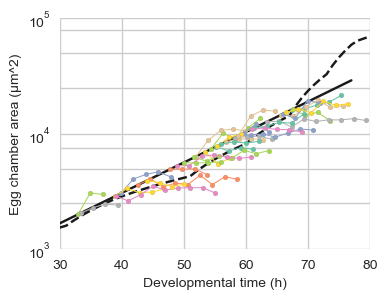

In [3]:
# Set figure style

plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (4, 3),'font.size': 10, 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})


# Data
df4 = pd.read_csv("/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Updated_6715_finetimeing_stage10.csv")

# Define data
x=df4['Hours6']
y=df4['Int_67_15_updated']

# Plot the curve fit and the actual data
plt.plot(x, y, color = 'k', linestyle = 'dashed')
plt.plot(x6, f6(x6),color = 'k')


# List of EC columns to loop over
ec_columns_y = ['yEC1', 'yEC2', 'yEC3', 'yEC4', 'yEC5', 'yEC6', 'yEC7', 'yEC8', 'yEC9', 'yEC10', 'yEC11', 'yEC12', 'yEC13', 'yEC14', 'yEC15', 'yEC16', 'yEC17', 'yEC18', 'yEC19', 'yEC20', 'yEC21', 'yEC22', 'yEC23', 'yEC24', 'yEC25', 'yEC26', 'yEC27', 'yEC28', 'yEC29', 'yEC30', 'yEC31', 'yEC32', 'yEC33', 'yEC34', 'yEC35', 'yEC36', 'yEC37', 'yEC38']

# List of time columns for x-axis
time_columns_x = ['xEC1', 'xEC2', 'xEC3', 'xEC4', 'xEC5', 'xEC6', 'xEC7', 'xEC8', 'xEC9', 'xEC10', 'xEC11', 'xEC12', 'xEC13', 'xEC14', 'xEC15', 'xEC16', 'xEC17', 'xEC18', 'xEC19', 'xEC20', 'xEC21', 'xEC22', 'xEC23', 'xEC24', 'xEC25', 'xEC26', 'xEC27', 'xEC28', 'xEC29', 'xEC30', 'xEC31', 'xEC32', 'xEC33', 'xEC34', 'yEC35', 'xEC36', 'xEC37', 'xEC38']
        

# Ensure that the DataFrame contains all the columns
required_columns = ec_columns_y + time_columns_x
missing_columns = [col for col in required_columns if col not in df4.columns]
if missing_columns:
   raise ValueError(f"DataFrame is missing columns: {missing_columns}")

# Set a color palette
palette = sns.color_palette("Set2", len(ec_columns_y))

# Specify the marker properties for each column
marker_style_dict = {ec_column: {'markersize': 3.5, 'edgecolor': 'gray', 'linewidth': 0.1} for ec_column in ec_columns_y}

# Loop through the EC columns and create line plots with specified marker properties
for i, ec_column in enumerate(ec_columns_y):
    style = marker_style_dict[ec_column]
    sns.lineplot(x=df4[time_columns_x[i]], y=df4[ec_column], marker='o', markersize=style['markersize'],
                 markeredgecolor=style['edgecolor'],
                 markeredgewidth=style['linewidth'], label=ec_column, color=palette[i], linewidth=0.75)
 
    
    
plt.xlabel('Developmental time (h)', fontsize=10)
plt.ylabel('Egg chamber area (μm^2)', fontsize=10)
plt.xlim(30, 80)
plt.ylim(1000, 75000)
plt.legend([])
plt.yscale("log")

extra_ticks = [1000, 2500, 5000, 7500, 10000, 25000, 50000, 80000,100000]  # Adjust as needed
plt.yticks(extra_ticks)


plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Area_curve_2h6715_updated_fineXst20_raw.pdf', dpi=300, bbox_inches='tight') 

plt.show()